
## Abtastrate


Die Abtastrate ist 100Hz

Geshätzte Grundfrequenz : 1-2Hz

In [ ]:
import numpy as np
print('Omega: %.2f - %.2f '% (np.pi*2*1,np.pi*2*2 ))

## Dimension

fn(t) hat die Dimension nx3
1.Spalte: a_0
2.Spalte: a_n
3.Spalte: b_n

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')

#---------------------------------------Data importieren--------------------------------
data = np.genfromtxt("data.txt")
# plot


#---------------------------------------Achsen separieren--------------------------------
x=data[:,0]
y=data[:,1]

#--------------------------------------Plot---------------------------------------------
fig, ax = plt.subplots()
ax.scatter(x,y,s=1)
ax.set(xlim=(0,np.amax(x)), xticks=np.arange(0, np.amax(x)),
       ylim=(np.amin(y)-0.1, np.amax(y)+0.1), yticks=np.arange(np.amin(y)-0.1, np.amax(y)+0.1))
ax.set_xlabel("time [s]")
ax.set_xlabel("Amplitude [V]")

plt.show()



### Fit mit FFT




In [ ]:
# This is a sample Python script.

# Press ⌃R to execute it or replace it with your code.
# Press Double ⇧ to search everywhere for classes, files, tool windows, actions, and settings.


"""---------Es gibt noch einen fehler bei aufgabe 3 aus ich versuche einen egenen Algorythmuss aus"""
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
plt.style.use('_mpl-gallery')

#---------------------------------------Data importieren--------------------------------
data = np.genfromtxt("data.txt")
# plot


#---------------------------------------Achsen separieren--------------------------------
x=data[:,0]
y=data[:,1]
#--------------------------------------Abtastrate---------------------------------------------
Ts=np.amax(x)/(len(x)-1)
#--------------------------------------System---------------------------------------------
time = np.linspace(0,np.amax(x),len(x))
spect_raw = np.fft.fft(y)
spect_raw = spect_raw/len(spect_raw)
freq = np.fft.fftfreq(time.size,d=0.01)

fit = np.array(np.zeros(len(time)))
for n in range(len(spect_raw)):
       for t in range(len(x)):
              fit[t] = fit[t] +spect_raw.real[n]*np.cos(freq[n]*2*np.pi*x[t])+np.imag(spect_raw.imag[n])*np.sin(freq[n]*2*np.pi*x[t])
#--------------------------------------Plot---------------------------------------------
fig, ax = plt.subplots()
ax.plot(x,y,x,fit)
ax.set(xlim=(0,np.amax(x)), xticks=np.arange(0, np.amax(x)),
       ylim=(np.amin(y)-0.1, np.amax(y)+0.1), yticks=np.arange(np.amin(y)-0.1, np.amax(y)+0.1))
ax.set_xlabel("time [s]")
ax.set_xlabel("Amplitude [V]")

plt.show()

### Fit mit Ausgleichsrechnung
Der Fit mit der FFT hat nicht so gut funktioniert, wie die mit der Ausgleichsrechnung. obwohl, beide etwa gleich gut sein sollten, da sie ja auf dem gleichen modell aufbauen. Möglicherweise würde ein Hanning Window helfen, ich denke jedoch nicht, dass dies der einzige grund für den Schlechten fit ist.

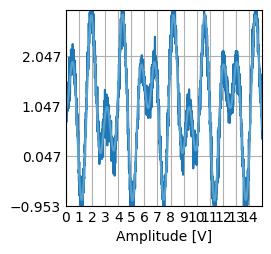

In [4]:
# This is a sample Python script.

# Press ⌃R to execute it or replace it with your code.
# Press Double ⇧ to search everywhere for classes, files, tool windows, actions, and settings.


"""---------Es gibt noch einen fehler bei aufgabe 3 aus ich versuche einen egenen Algorythmuss aus"""
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from scipy.linalg import solve_triangular
from scipy.linalg import cholesky
plt.style.use('_mpl-gallery')

#---------------------------------------Data importieren--------------------------------
data = np.genfromtxt("data.txt")
# plot


#---------------------------------------Achsen separieren--------------------------------
x=data[:,0]
y=data[:,1]
#--------------------------------------Abtastrate---------------------------------------------
Ts=np.amax(x)/(len(x)-1)
#--------------------------------------System---------------------------------------------
n = 1+5*2 #anzahl Schwingungen
A = np.array(np.zeros([n,len(x)]))

A[0,]= 0.5
for o in range(1,n):
    if( np.mod(o,2)==1):
        A[o,1:] = np.cos(o*x[1:])
    if (np.mod(o,2) == 0):
        A[o,1:] = np.sin(o * x[1:])
A = A.T
#-----A^TA ausrechnen---------------------
A_dig = A.T @ A
b_dig = A.T @ y
#Cholesky zerlegung
L = cholesky(A_dig,lower = True)

#     Ly = A^T *b nach y auflösen
los = solve_triangular(L,b_dig,lower = True)
los = solve_triangular(L.T ,los,lower = False)



fit = np.array(np.zeros(len(x)))
fit[:] = (A @ los)




#--------------------------------------Plot---------------------------------------------
fig, ax = plt.subplots()
ax.plot(x,y,x,fit)
ax.set(xlim=(0,np.amax(x)), xticks=np.arange(0, np.amax(x)),
       ylim=(np.amin(fit)-0.1, np.amax(fit)+0.1), yticks=np.arange(np.amin(fit)-0.1, np.amax(fit)+0.1))
ax.set_xlabel("time [s]")
ax.set_xlabel("Amplitude [V]")

plt.show()